In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline




In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop("customerID",axis="columns",inplace=True)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.dtypes
#total charges in the "object" convert to float

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
pd.to_numeric(df.TotalCharges)
# there are space in it so 

ValueError: Unable to parse string " " at position 488

In [ ]:
#check for the null element in the "TotalCharges"

In [8]:
b=pd.to_numeric(df.TotalCharges,errors="coerce").isnull()

In [9]:
b.describe()

count      7043
unique        2
top       False
freq       7032
Name: TotalCharges, dtype: object

In [10]:
7043-7032


11

In [11]:
df[pd.to_numeric(df.TotalCharges,errors="coerce").isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df.iloc[488]
#integer location

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [12]:
#not taking that 11 rosw

df3=df[df.TotalCharges!=" "]


In [13]:
df3.TotalCharges=pd.to_numeric(df3.TotalCharges)

/Users/smithss/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
df3.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
not_leaving=df3[df.Churn=="No"].tenure
leaving=df3[df3.Churn=="Yes"].tenure

/var/folders/zp/yykz6vt92kgckn24pqx3zc7w0000gn/T/ipykernel_78691/2567774221.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  not_leaving=df3[df.Churn=="No"].tenure


Text(0.5, 1.0, 'Churn')

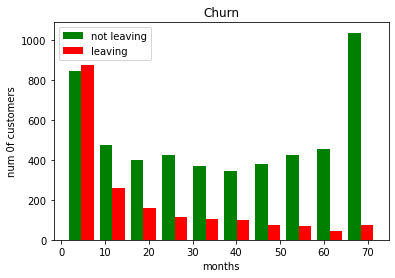

In [16]:
plt.hist([not_leaving,leaving],color=("green","red"),label=["not leaving","leaving"])
plt.legend()

plt.xlabel("months")
plt.ylabel("num 0f customers")
plt.title("Churn")

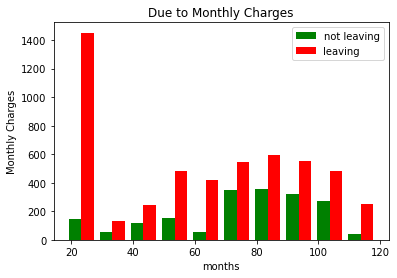

In [17]:
not_leaving=df3[df3.Churn=="No"].MonthlyCharges
leaving=df3[df3.Churn=="Yes"].MonthlyCharges

plt.xlabel("months")
plt.ylabel("Monthly Charges")
plt.title("Due to Monthly Charges")

plt.hist([leaving,not_leaving],color=("green","red"),label=["not leaving","leaving"])
plt.legend()

In [18]:
#columns
for i in df3:
  print (i)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [19]:
for i in df3:
  print (df[i].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [25]:
def ob_check(df):
  for i in df3:
    if df3[i].dtypes=="object":
      print (f'{i} : {df3[i].unique()}')
  

In [21]:
#  inplace=True
#helps to save it in the df

df3.replace("No internet service","No",inplace=True)
df3.replace("No phone service","No",inplace=True)


/Users/smithss/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [ ]:
df3.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
ob_check(df3)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [27]:
yn_columns=["Partner","Dependents" ,"PhoneService" ,"MultipleLines" ,"OnlineSecurity","OnlineBackup" ,"DeviceProtection" 
 ,"TechSupport" ,"StreamingTV" ,"StreamingMovies" ,"PaperlessBilling" ,"Churn"]

In [28]:
for i in yn_columns:
   df3[i].replace({"Yes":1,"No":0},inplace=True)

/Users/smithss/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [14]:
df3.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [40]:
def check(df3):
    print(df3.dtypes)

In [32]:
ob_check(df3)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [38]:
df3["gender"].replace({"Female":1,"Male":0},inplace=True)

/Users/smithss/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [41]:
check(df3)



gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [42]:
# one hot encding 
df3=pd.get_dummies(data=df3,columns=["InternetService","PaymentMethod","Contract"])



In [ ]:
# need to scale the values of the [tenure,MonthlyCharges,TotalCharges]

In [43]:
scale_col=["tenure","MonthlyCharges","TotalCharges"]

# we need to take min max scalar from the sciket learn to put that values to 
#the 0 to 1 range

from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

df3[scale_col]=scalar.fit_transform(df3[scale_col])



In [44]:
check(df3)


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [45]:
#need to take the labels like (x,y)

x=df3.drop("Churn",axis="columns")
y=df3["Churn"]


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=5)

In [47]:
print(x_train.shape,y_train.shape)

(5625, 26) (5625,)


In [48]:
print (x_train.shape)

(5625, 26)


In [49]:
# Ann            Neural Network


import tensorflow as tf

from tensorflow import keras



2023-02-04 15:18:17.685947: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
"What is dense in Keras layer?"
# Keras Dense layer is the layer that contains all the neurons that are deeply connected within themselves. 
# This means that every neuron in the dense layer takes the input from all the other neurons of the previous layer. 
# We can add as many dense layers as required. It is one of the most commonly used layers.

'What is dense in Keras layer?'

In [50]:
model= keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")])



2023-02-04 15:18:58.836775: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [52]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [53]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
176/176 [==============================] - 1s 953us/step - loss: 0.5606 - accuracy: 0.6924
Epoch 2/50
176/176 [==============================] - 0s 926us/step - loss: 0.4368 - accuracy: 0.7968
Epoch 3/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4220 - accuracy: 0.7996
Epoch 4/50
176/176 [==============================] - 0s 928us/step - loss: 0.4172 - accuracy: 0.8011
Epoch 5/50
176/176 [==============================] - 0s 865us/step - loss: 0.4151 - accuracy: 0.8039
Epoch 6/50
176/176 [==============================] - 0s 855us/step - loss: 0.4135 - accuracy: 0.8066
Epoch 7/50
176/176 [==============================] - 0s 854us/step - loss: 0.4125 - accuracy: 0.8060
Epoch 8/50
176/176 [==============================] - 0s 856us/step - loss: 0.4120 - accuracy: 0.8059
Epoch 9/50
176/176 [==============================] - 0s 889us/step - loss: 0.4108 - accuracy: 0.8064
Epoch 10/50
176/176 [==============================] - 0s 888us/step - loss: 0.4102 

In [54]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4448 - accuracy: 0.7832


[0.4447852075099945, 0.783226728439331]

In [55]:
yb=model.predict(x_test)

44/44 [==============================] - 0s 1ms/step


In [44]:
len(yb) #test data

1407

In [56]:
yb[:5]

array([[0.17605884],
       [0.47667798],
       [0.00708547],
       [0.70211124],
       [0.4579989 ]], dtype=float32)

In [57]:
y_predict=[]
for i in yb:
    if i>0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)
            
    

In [58]:
y_predict[:5]

[0, 0, 0, 1, 0]

In [59]:
from sklearn.metrics import confusion_matrix, classification_report
print (classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       999
           1       0.69      0.45      0.55       408

    accuracy                           0.78      1407
   macro avg       0.75      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



# Confusion metrics 

In [61]:
from sklearn import sns



cm= tf.math.Confusion_matrix(labels=y_test,predictions=y_predict)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("predicted values")
plt.ylabel("Truth ")

ImportError: cannot import name 'sns' from 'sklearn' (/Users/smithss/opt/anaconda3/lib/python3.9/site-packages/sklearn/__init__.py)

In [63]:

cf_matrix = confusion_matrix(y_test, y_predict)
print(cf_matrix)

[[917  82]
 [223 185]]


<AxesSubplot:>

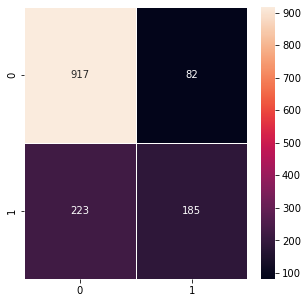

In [67]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')

